## Supervised Learning in the Perceptron Neuron

### Team Members
- **Juliana Ballin Lima** – Registration: 2315310011  
- **Marcelo Heitor de Almeida Lira** – Registration: 2315310043  
- **Lucas Maciel Gomes** – Registration: 2315310014  
- **Ryan da Silva Marinho** – Registration: 2315310047  
- **Vitória Gabrielle Kinshasa Silva de Almeida** – Registration: 2415280044 

In [196]:
"""
Libraries required for the project.
Mandatory: numpy, random, math, matplotlib.
sklearn is allowed only for performance metrics.
"""

import numpy as np
import random
import math
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [197]:
"""
Display team members in a structured way.
This ensures clarity and meets evaluation criteria.
"""

team_members = {
    "Juliana Ballin Lima": "2315310011",
    "Marcelo Heitor de Almeida Lira": "2315310043",
    "Lucas Maciel Gomes": "2315310014",
    "Ryan da Silva Marinho": "2315310047",
    "Vitória Gabrielle Kinshasa Silva de Almeida": "2415280044"
}

for name, reg in team_members.items():
    print(f"{name} - {reg}")

Juliana Ballin Lima - 2315310011
Marcelo Heitor de Almeida Lira - 2315310043
Lucas Maciel Gomes - 2315310014
Ryan da Silva Marinho - 2315310047
Vitória Gabrielle Kinshasa Silva de Almeida - 2415280044


In [198]:
"""
Calculate team identifier based on the sum of the last digits
of registration numbers, applying modulo 4.
"""

# Last digits of registrations
ids = [1, 3, 4, 7, 4]  
team_sum = sum(ids)
team_identifier = team_sum % 4

print("Team identifier:", team_identifier)

Team identifier: 3


In [199]:
"""
Utility functions for the Perceptron algorithm.
Includes activation and training procedure.
"""

def activation_function(u: float) -> int:
    """
    Step activation function with threshold θ = 0.
    Args:
        u (float): Linear combination input
    Returns:
        int: 1 if u >= 0 else 0
    """
    return 1 if u >= 0 else 0


def perceptron_train(X, y, eta=0.1, max_epochs=1000, initial_weights=None):
    """
    Perceptron training until convergence or max_epochs.
    
    Args:
        X (ndarray): input data with bias
        y (ndarray): labels (0 or 1)
        eta (float): learning rate
        max_epochs (int): maximum iterations
        initial_weights (ndarray): optional starting weights
    
    Returns:
        tuple: (final_weights, epochs, adjustments, initial_weights)
    """
    if initial_weights is None:
        w = np.random.uniform(-0.5, 0.5, X.shape[1])
    else:
        w = initial_weights.copy()

    adjustments = 0
    epoch = 0

    while epoch < max_epochs:
        error_count = 0
        for i in range(len(X)):
            u = np.dot(X[i], w)
            y_hat = 1 if u >= 0 else 0
            e = y[i] - y_hat
            if e != 0:
                w += eta * e * X[i]
                adjustments += 1
                error_count += 1
        if error_count == 0:
            break
        epoch += 1

    return w, epoch, adjustments, initial_weights


In [200]:
"""
Utility to load datasets provided by the professor.
Files were saved in raw binary format using numpy.tofile().
Each row has (x1, x2, yd).
"""

import numpy as np

def load_dataset(path: str) -> np.ndarray:
    """Load dataset from binary file and reshape to (m, 3)."""
    return np.fromfile(path, dtype=np.float64).reshape(-1, 3)

## Part I: Linearly Separable Problem

In [201]:
"""
Load the dataset dataAll.txt for Part I.
Split into features (X) and labels (y).
Add bias term (column of ones).
"""

# Load dataset
data = load_dataset("data/dataAll.txt")

# Features and labels
X = data[:, :2]
y = data[:, 2].astype(int)

# Add bias
X_bias = np.c_[np.ones(X.shape[0]), X]

print("--- Dataset loaded ---")
print("Shape:", data.shape)
print("Class distribution:", np.bincount(y))
print("First 5 rows:\n", data[:5])

--- Dataset loaded ---
Shape: (1000, 3)
Class distribution: [476 524]
First 5 rows:
 [[-363.7884  244.1423    0.    ]
 [ 328.7572 -256.7658    1.    ]
 [-164.9827  613.2164    0.    ]
 [ 536.5905  764.9575    0.    ]
 [ 314.2297  343.8375    0.    ]]


In [202]:
"""
Split dataset into input features (X) and labels (y).
Add bias term (column of ones) to X.
"""

# Features and labels
X = data[:, :2]
y = data[:, 2].astype(int)

# Add bias
X_bias = np.c_[np.ones(X.shape[0]), X]

print("X_bias shape:", X_bias.shape)
print("y distribution:", np.bincount(y))

X_bias shape: (1000, 3)
y distribution: [476 524]


In [210]:
"""
Train the Perceptron on the linearly separable dataset.
Learning rate η = 0.1 (as specified in the assignment).
"""

# Generate initial weights
initial_weights = np.random.uniform(-0.5, 0.5, X_bias.shape[1])

# Train using the same initial weights
weights, epochs, adjustments, used_init = perceptron_train(
    X_bias, y, eta=0.1, initial_weights=initial_weights
)

# Results
print("--- Training finished ---")
print(f"Initial weights: {used_init}")
print(f"Final weights: {weights}")
print(f"Epochs until convergence: {epochs}")
print(f"Total adjustments: {adjustments}")


--- Training finished ---
Initial weights: [ 0.16679966 -0.29921331  0.45888928]
Final weights: [   0.66679966  323.10981669 -323.05195072]
Epochs until convergence: 3
Total adjustments: 55


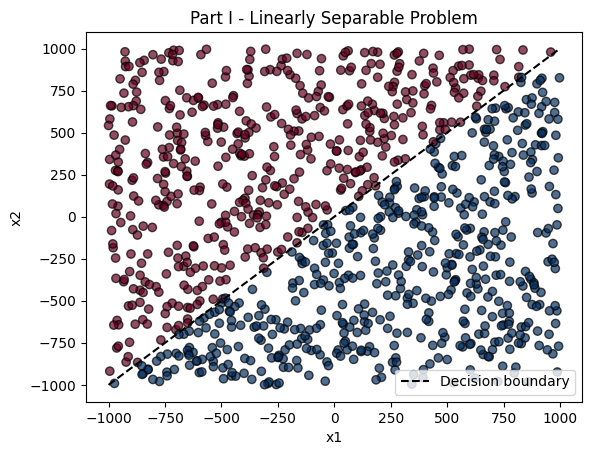

In [204]:
"""
Plot dataset points and decision boundary learned by the Perceptron.
Class 0 = red, Class 1 = blue.
"""

# Scatter plot with class colors
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu, edgecolors='k', alpha=0.7)

# Compute decision boundary line
x_vals = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
y_vals = -(weights[0] + weights[1] * x_vals) / weights[2]

plt.plot(x_vals, y_vals, 'k--', label="Decision boundary")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Part I - Linearly Separable Problem")
plt.legend()
plt.show()

## Part II: Experimentation

In [205]:
"""
Experiment with multiple configurations of learning rate and 
weight initialization intervals. Perform 10 runs for each setup.
"""

'\nExperiment with multiple configurations of learning rate and \nweight initialization intervals. Perform 10 runs for each setup.\n'

## Part III: Holdout Validation

In [206]:
"""
Holdout validation using dataHoldout.txt.
Split into 70% training / 30% testing.
Compute metrics: confusion matrix, accuracy, precision, recall, F1.
"""

'\nHoldout validation using dataHoldout.txt.\nSplit into 70% training / 30% testing.\nCompute metrics: confusion matrix, accuracy, precision, recall, F1.\n'

## Conclusions